In [1]:
pip install pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.



  Using cached numpy-1.20.3-cp37-cp37m-win_amd64.whl (13.6 MB)
  Using cached scipy-1.5.4-cp37-cp37m-win_amd64.whl (31.2 MB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1


In [2]:
from pandas import *

In [3]:
dataset =read_csv("data.csv")

In [4]:
dataset

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000
1519,1138.75000,39.00000,5.8,11.10000
1520,1138.97059,39.00000,5.8,11.11765
1521,1144.65881,35.00000,5.8,11.12760


In [5]:
#dataset =get_data('bike')

In [6]:
dataset.describe()

,Rainfall,Temperature,Ph,Production
count,1523.000000,1523.000000,1523.000000,1523.000000
mean,1027.102072,18.976472,5.897045,2.162630
std,33.114394,5.051640,0.187024,2.633592
min,1000.499200,11.000000,5.500000,0.039940
25%,1010.000000,17.000000,5.800000,0.782910
50%,1015.039060,17.000000,5.800000,1.203130
75%,1024.082230,21.000000,6.000000,1.926580
max,1241.250000,39.000000,6.500000,19.300000


In [20]:
from pycaret.regression import *
s = setup(dataset, target = 'Production',use_gpu=True )

,Description,Value
0,session_id,629
1,Target,Production
2,Original Data,"(1523, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1066, 3)"


In [21]:
from numba import jit,cuda
@jit(backend= cuda)
def bestmodel():
    best = compare_models()
    return best

In [22]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0136,0.0017,0.0351,0.9998,0.0080,0.0127,0.0450
lr,Linear Regression,0.0189,0.0025,0.0485,0.9996,0.0147,0.0155,0.0040
ridge,Ridge Regression,0.0186,0.0025,0.0485,0.9996,0.0145,0.0150,0.0040
en,Elastic Net,0.0254,0.0029,0.0531,0.9996,0.0145,0.0176,0.0060
lar,Least Angle Regression,0.0189,0.0025,0.0485,0.9996,0.0147,0.0155,0.0060
omp,Orthogonal Matching Pursuit,0.0172,0.0026,0.0500,0.9996,0.0132,0.0106,0.0050
br,Bayesian Ridge,0.0188,0.0025,0.0485,0.9996,0.0146,0.0152,0.0050
dt,Decision Tree Regressor,0.0086,0.0035,0.0468,0.9995,0.0067,0.0065,0.0110
lasso,Lasso Regression,0.0327,0.0035,0.0590,0.9995,0.0163,0.0237,0.0050
et,Extra Trees Regressor,0.0063,0.0070,0.0524,0.9992,0.0049,0.0044,0.6340


In [29]:
a=create_model('lr',fold=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0294,0.0051,0.0717,0.9993,0.0230,0.0218
1,0.0097,0.0005,0.0231,0.9999,0.0046,0.0060
2,0.0145,0.0015,0.0389,0.9997,0.0206,0.0163
3,0.0294,0.0047,0.0684,0.9997,0.0119,0.0117
4,0.0249,0.0040,0.0632,0.9993,0.0185,0.0218
5,0.0311,0.0059,0.0765,0.9990,0.0298,0.0312
6,0.0135,0.0006,0.0237,0.9999,0.0105,0.0104
7,0.0164,0.0008,0.0283,0.9999,0.0079,0.0099
8,0.0229,0.0022,0.0471,0.9997,0.0209,0.0192


In [24]:
evaluate_model(a)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
a.intercept_


-79.75189

In [31]:
a.coef_

array([ 0.07925826, -0.00072083,  0.08836325], dtype=float32)

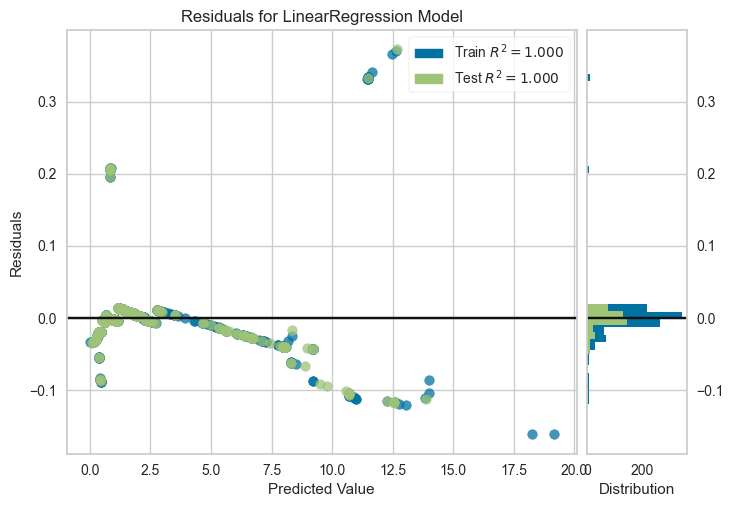

In [32]:
plot_model(a)